In [2]:
%pip install mediapipe



  Using cached cffi-1.17.1-cp310-cp310-win_amd64.whl.metadata (1.6 kB)
  Using cached pycparser-2.22-py3-none-any.whl.metadata (943 bytes)
  Using cached contourpy-1.3.2-cp310-cp310-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.8-cp310-cp310-win_amd64.whl.metadata (6.3 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
INFO: pip is looking at multiple versions of opencv-contrib-python to determine which version is compatible with other requirements. This could take a while.
   ---------------------------------------- 0.0/51.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/51.0 MB ? eta -:--:--
   ---------------------------------------- 0.5/51.0 MB 1.9 MB/s eta 0:00:28
    --------------------------------------- 0.8/51.0 MB 1.4 MB/s eta 0:00:36
    --------------------------------------- 1.0/51.0 MB 1.2 MB/s eta 0:00:42
   - -------------------------------------- 1.3/51.

In [4]:
%pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [5]:
%pip install streamlit

  Using cached streamlit-1.46.1-py3-none-any.whl.metadata (9.0 kB)
  Using cached altair-5.5.0-py3-none-any.whl.metadata (11 kB)
  Using cached GitPython-3.1.44-py3-none-any.whl.metadata (13 kB)
  Using cached pydeck-0.9.1-py2.py3-none-any.whl.metadata (4.1 kB)
  Using cached jsonschema-4.24.0-py3-none-any.whl.metadata (7.8 kB)
  Using cached jsonschema_specifications-2025.4.1-py3-none-any.whl.metadata (2.9 kB)
Using cached streamlit-1.46.1-py3-none-any.whl (10.1 MB)
Using cached altair-5.5.0-py3-none-any.whl (731 kB)
Using cached GitPython-3.1.44-py3-none-any.whl (207 kB)
Using cached pydeck-0.9.1-py2.py3-none-any.whl (6.9 MB)
Using cached jsonschema-4.24.0-py3-none-any.whl (88 kB)
Using cached jsonschema_specifications-2025.4.1-py3-none-any.whl (18 kB)

   ---------------------------------------- 0/6 [pydeck]
   ---------------------------------------- 0/6 [pydeck]
   ---------------------------------------- 0/6 [pydeck]
   ---------------------------------------- 0/6 [pydeck]
   ---

In [6]:
%pip install torchvision


  Using cached torchvision-0.22.1-cp310-cp310-win_amd64.whl.metadata (6.1 kB)
Using cached torchvision-0.22.1-cp310-cp310-win_amd64.whl (1.7 MB)


In [2]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install scikit-learn

   ---------------------------------------- 0.0/8.9 MB ? eta -:--:--
   --- ------------------------------------ 0.8/8.9 MB 4.8 MB/s eta 0:00:02
   -------- ------------------------------- 1.8/8.9 MB 5.0 MB/s eta 0:00:02
   -------------- ------------------------- 3.1/8.9 MB 5.3 MB/s eta 0:00:02
   -------------------- ------------------- 4.5/8.9 MB 5.6 MB/s eta 0:00:01
   ------------------------- -------------- 5.8/8.9 MB 5.7 MB/s eta 0:00:01
   ------------------------------ --------- 6.8/8.9 MB 5.7 MB/s eta 0:00:01
   ------------------------------------ --- 8.1/8.9 MB 5.9 MB/s eta 0:00:01
   ---------------------------------------- 8.9/8.9 MB 5.6 MB/s eta 0:00:00

   ------------- -------------------------- 1/3 [joblib]
   ------------- -------------------------- 1/3 [joblib]
   ------------- -------------------------- 1/3 [joblib]
   ------------- -------------------------- 1/3 [joblib]
   ------------- -------------------------- 1/3 [joblib]
   ------------- --------------------

In [1]:
%pip show sklearn

Note: you may need to restart the kernel to use updated packages.


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import time
from IPython.display import clear_output
import mediapipe as mp
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models, transforms
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from torch.utils.data import Dataset, DataLoader
import numpy as np

In [4]:
def display_frame(frame):
    """Display a single frame in the Jupyter Notebook."""
    # Convert BGR (OpenCV) to RGB (matplotlib)
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(8, 6))
    plt.imshow(frame_rgb)
    plt.axis('off')  # Hide axes
    plt.show()

In [26]:
def display_live_frame(frame):
    """Display a frame in Jupyter with matplotlib."""
    # Convert BGR (OpenCV) to RGB (matplotlib)
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(8, 6))
    plt.imshow(frame_rgb)
    plt.axis('off')  # Hide axes
    plt.show()

def capture_webcam(max_frames=300):
    """Capture and display live webcam feed in Jupyter."""
    # Initialize webcam (0 for default; try 1 or 2 for external webcams)
    cap = cv2.VideoCapture(0)
    
    # Check if webcam opened
    if not cap.isOpened():
        print("Error: Could not open webcam. Check if it's connected or in use.")
        return
    
    # Set target FPS (30 FPS)
    target_fps = 45
    frame_time = 1.0 / target_fps  # Time per frame in seconds
    
    frame_count = 0
    try:
        while frame_count < max_frames:
            start_time = time.time()  # Track frame processing time
            
            # Read a frame
            ret, frame = cap.read()
            if not ret:
                print("Error: Could not read frame.")
                break
            
            # Clear previous output and display new frame
            clear_output(wait=True)  # Clear the previous frame
            display_live_frame(frame)
            frame_count += 1
            
            # Maintain 30 FPS
            elapsed_time = time.time() - start_time
            if elapsed_time < frame_time:
                time.sleep(frame_time - elapsed_time)
            
            # Optional: Exit on 'q' (requires focus on any OpenCV window if active)
            if cv2.waitKey(1) & 0xFF == ord('q'):
                print("Exiting webcam feed...")
                break
    
    except KeyboardInterrupt:
        print("Feed stopped by user.")
    except Exception as e:
        print(f"An error occurred: {e}")
    
    finally:
        # Release webcam and close plots
        cap.release()
        cv2.destroyAllWindows()
        plt.close('all')

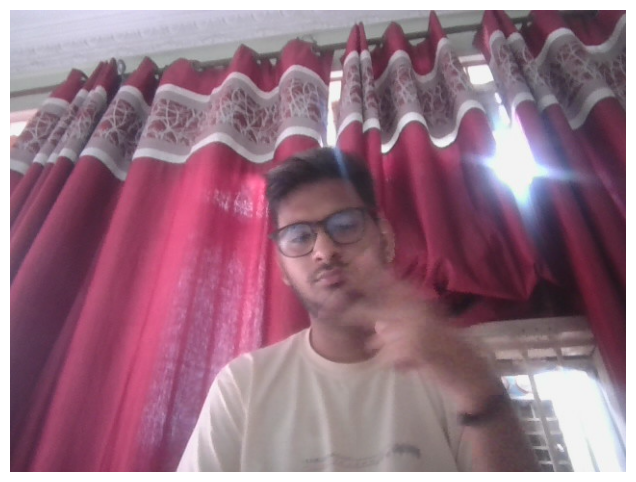

In [30]:
capture_webcam(max_frames=20)

In [19]:
model_path='gesture_model_2708.pth'
scaler_mean_path='scaler_mean_2708.npy'
scaler_scale_path='scaler_scale_2708.npy'

for path in [model_path, scaler_mean_path, scaler_scale_path]:
    if not os.path.exists(path):
        raise FileNotFoundError(f"File not found: {path}")

In [20]:
class GestureMLP(nn.Module):
    def __init__(self,input_size=42,hidden_size=128,num_classes=6):
        super(GestureMLP,self).__init__()
        self.fc1=nn.Linear(input_size,hidden_size)
        self.relu=nn.ReLU()
        self.fc2= nn.Linear(hidden_size,hidden_size)
        self.fc3=nn.Linear(hidden_size,num_classes)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        return x

In [21]:
model = GestureMLP(input_size=42)
model.load_state_dict(torch.load(model_path))
model.eval()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

scaler_mean = np.load(scaler_mean_path)
scaler_scale = np.load(scaler_scale_path)
print("Loaded scaler mean shape:", scaler_mean.shape)  # Should be (42,)
print("Loaded scaler scale shape:", scaler_scale.shape)

Loaded scaler mean shape: (42,)
Loaded scaler scale shape: (42,)


In [22]:
CLASSES = ['Stone', 'Paper', 'Scissors',"Thumbs up","Thumbs down","other"]



In [23]:
def preprocess_landmarks(landmarks):
    """Extract and preprocess hand landmarks (2D coordinates)."""
    coords = []
    for lm in landmarks.landmark:
        coords.extend([lm.x, lm.y])  # 2D coordinates only
        
    coords = np.array(coords).reshape(1, -1)
    print("Landmarks shape:", coords.shape)  # Should be (1, 42)
    coords = (coords - scaler_mean) / scaler_scale  # Standardize
    return torch.tensor(coords, dtype=torch.float32).to(device)

In [24]:
def capture_webcam_with_gestures_with_classification(max_frames=30, target_fps=45):

    mp_hands = mp.solutions.hands
    hands = mp_hands.Hands(
        max_num_hands=1,           # Enforce single hand detection
        min_detection_confidence=0.7  # As per your project (70% confidence)
    )
    mp_drawing = mp.solutions.drawing_utils
    """Capture live feed with gesture classification."""
    cap = cv2.VideoCapture(0)
    if not cap.isOpened():
        print("Error: Could not open webcam.")
        return
    
    cap.set(cv2.CAP_PROP_FRAME_WIDTH, 320)
    cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 240)
    
    hands = mp_hands.Hands(max_num_hands=1, min_detection_confidence=0.7)
    
    frame_time = 1.0 / target_fps  # 22.2ms per frame
    frame_count = 0
    start_time_total = time.time()
    
    try:
        while frame_count < max_frames:
            start_time = time.time()
            ret, frame = cap.read()
            if not ret:
                print("Error: Could not read frame.")
                break
            
            frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            results = hands.process(frame_rgb)
            print(results)
            gesture = "No gesture"
            if results.multi_hand_landmarks:
                if len(results.multi_hand_landmarks) == 1:
                    mp_drawing.draw_landmarks(frame, results.multi_hand_landmarks[0], mp_hands.HAND_CONNECTIONS)
                    landmarks = preprocess_landmarks(results.multi_hand_landmarks[0])
                    print(landmarks)
                    with torch.no_grad():
                        outputs = model(landmarks)
                        probs = torch.softmax(outputs, dim=1)
                        confidence, gesture_idx = torch.max(probs, 1)
                        confidence = confidence.item()
                        if confidence > 0.5:  # Per project summary
                            gesture = f"{CLASSES[gesture_idx.item()]} ({confidence:.2f})"
                        else:
                            gesture = "Uncertain gesture"
                else:
                    gesture = "Show only ONE hand!"
            else:
                gesture = "No hand detected"
            
            cv2.putText(frame, gesture, (10, 30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1)
            
            clear_output(wait=True)
            display_live_frame(frame)
            frame_count += 1
            
            elapsed_time = time.time() - start_time
            if elapsed_time < frame_time:
                # time.sleep(frame_time - elapsed_time)
                pass
            
            print(f"Frame {frame_count}: {elapsed_time*1000:.1f}ms")
        
        elapsed_total = time.time() - start_time_total
        actual_fps = frame_count / elapsed_total if elapsed_total > 0 else 0
        print(f"Average FPS: {actual_fps:.2f} | Total time: {elapsed_total:.2f}s")
    
    except KeyboardInterrupt:
        print("Feed stopped by user.")
    except Exception as e:
        print(f"An error occurred: {e}")
    
    finally:
        cap.release()
        hands.close()
        cv2.destroyAllWindows()
        plt.close('all')

In [11]:

def capture_webcam_with_hands(max_frames=30, target_fps=45):

    mp_hands = mp.solutions.hands
    hands = mp_hands.Hands(
        max_num_hands=1,           # Enforce single hand detection
        min_detection_confidence=0.7  # As per your project (70% confidence)
    )
    mp_drawing = mp.solutions.drawing_utils
    """Capture live webcam feed with hand detection."""
    cap = cv2.VideoCapture(0)
    
    if not cap.isOpened():
        print("Error: Could not open webcam.")
        return
    
    # Reduce resolution for faster processing
    cap.set(cv2.CAP_PROP_FRAME_WIDTH, 640)
    cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 480)
    
    frame_time = 1.0 / target_fps  # Time per frame (22.2ms for 45 FPS)
    frame_count = 0
    start_time_total = time.time()  # For FPS calculation
    
    try:
        while frame_count < max_frames:
            start_time = time.time()
            
            ret, frame = cap.read()
            if not ret:
                print("Error: Could not read frame.")
                break
            
            # Process with MediaPipe
            frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            results = hands.process(frame_rgb)
            print(results)
            
            # Draw landmarks or error messages
            if results.multi_hand_landmarks:
                if len(results.multi_hand_landmarks) == 1:
                    mp_drawing.draw_landmarks(frame, results.multi_hand_landmarks[0], mp_hands.HAND_CONNECTIONS)
                else:
                    cv2.putText(frame, "Show only ONE hand!", (10, 30), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
            else:
                cv2.putText(frame, "No hand detected", (10, 30), 
                           cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
            
            # Display frame
            clear_output(wait=True)
            display_live_frame(frame)
            frame_count += 1
            
            # Maintain target FPS
            elapsed_time = time.time() - start_time
            # if elapsed_time < frame_time:
            #     time.sleep(frame_time - elapsed_time)
            
            # Log frame time
            print(f"Frame {frame_count}: {elapsed_time*1000:.1f}ms")
        
        # Calculate and display average FPS
        elapsed_total = time.time() - start_time_total
        actual_fps = frame_count / elapsed_total if elapsed_total > 0 else 0
        print(f"Average FPS: {actual_fps:.2f} | Total time: {elapsed_total:.2f}s")
    
    except KeyboardInterrupt:
        print("Feed stopped by user.")
    except Exception as e:
        print(f"An error occurred: {e}")
    
    finally:
        cap.release()
        hands.close()
        cv2.destroyAllWindows()
        plt.close('all')

In [27]:
capture_webcam_with_gestures_with_classification(max_frames=300,target_fps=30)

Feed stopped by user.


## Datset Creation Pipeline

In [5]:
# Creating a mediapipe function which takes an image and returns the landmarks
def get_hand_landmarks(image):
    """Extract hand landmarks from an image using MediaPipe."""
    mp_hands = mp.solutions.hands
    hands = mp_hands.Hands(
        max_num_hands=1,           # Enforce single hand detection
        min_detection_confidence=0.7  # As per your project (70% confidence)
    )
    
    # Convert image to RGB for MediaPipe processing
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = hands.process(image_rgb)
    
    if results.multi_hand_landmarks:
        return results.multi_hand_landmarks[0]  # Return the first detected hand landmarks
    else:
        return None  # No hand detected

In [6]:
# Take an Image input from user camera feed and capture on key press
def capture_image_from_webcam():
    """Open webcam, show live feed, and capture image on key press."""
    cap = cv2.VideoCapture(0)
    if not cap.isOpened():
        print("Error: Could not open webcam.")
        return None

    captured_frame = None
    print("Press 's' to capture an image, or 'q' to quit.")

    while True:
        ret, frame = cap.read()
        if not ret:
            print("Error: Could not read frame.")
            break

        # Show the frame
        cv2.imshow("Webcam Feed - Press 's' to capture", frame)
        key = cv2.waitKey(1) & 0xFF

        if key == ord('s'):
            captured_frame = frame.copy()
            print("Image captured.")
            break
        elif key == ord('q'):
            print("Quitting without capturing.")
            break

    cap.release()
    cv2.destroyAllWindows()
    return captured_frame

In [7]:
# Store the landmarks in a csv file along with the category
def store_landmarks_in_csv(landmarks, category, csv_file='New_Manual_data.csv'):
    """Store hand landmarks in a CSV file with category."""
    if landmarks is None:
        print("No landmarks to store.")
        return
    if category is None:
        print("No category specified.")
        return

    # Convert landmarks to a flat list of coordinates
    coords = []
    for lm in landmarks.landmark:
        coords.extend([lm.x, lm.y])  # 2D coordinates only
    
    # Create a DataFrame
    df = pd.DataFrame([coords], columns=[f'coord_{i}' for i in range(len(coords))])
    df['category'] = category  # Add category column
    
    # Append to CSV file
    if not os.path.exists(csv_file):
        df.to_csv(csv_file, index=False)  # Create file if it doesn't exist
    else:
        df.to_csv(csv_file, mode='a', header=False, index=False)  # Append to existing file
    
    print(f"Stored landmarks for category '{category}' in {csv_file}.")

In [8]:
# Function to call the above function  and take image input and ctagory input and store the landmarks in a csv file
def capture_and_store_landmarks():
    """Capture an image, extract landmarks, and store them in a CSV file."""
    # Capture image from webcam
    image = capture_image_from_webcam()
    if image is None:
        return
    
    # Get hand landmarks
    landmarks = get_hand_landmarks(image)
    
    # Display the captured image with landmarks (if any)
    if landmarks:
        mp_drawing = mp.solutions.drawing_utils
        mp_hands = mp.solutions.hands
        mp_drawing.draw_landmarks(image, landmarks, mp_hands.HAND_CONNECTIONS)
        display_frame(image)
    else:
        print("No hand detected in the captured image.")
    
    # Get category input from user
    category = input("Enter category for the captured hand gesture (e.g., 'Stone', 'Paper', 'Scissors'): ")
    
    # Store landmarks in CSV file
    store_landmarks_in_csv(landmarks, category)

Press 's' to capture an image, or 'q' to quit.
Image captured.


c:\Projects\ML\Stone Paper Scissor\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


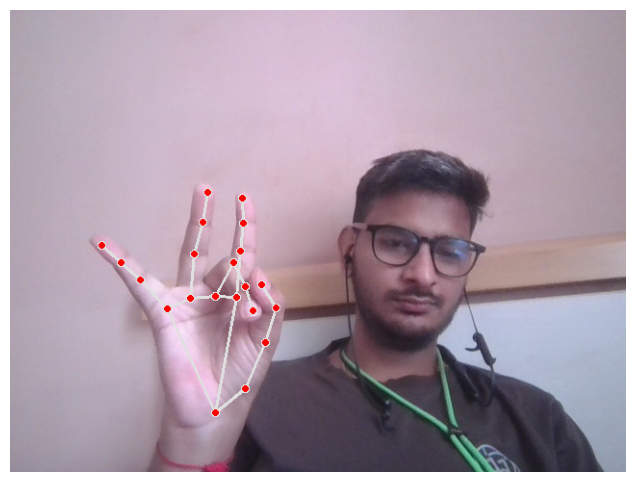

Stored landmarks for category 'other' in New_Manual_data.csv.


In [18]:
for i in range(15):
    # clear output
    clear_output(wait=True)
    capture_and_store_landmarks()

#Classes=[Stone, Paper, Scissor,Thumbs_up,Thumbs_down] 